<a href="https://colab.research.google.com/github/indu-cmd/Mini-Project-healthcare-/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
No_Data_Path = Path("/content/drive/MyDrive/brain tumer/no")
Yes_Data_Path = Path("/content/drive/MyDrive/brain tumer/yes")

In [ ]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [ ]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('/content/drive/MyDrive/brain tumer/no/no1446.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1426.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1435.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1437.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1423.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('/content/drive/MyDrive/brain tumer/yes/y1452.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/yes/y1424.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/yes/y1415.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/yes/y1430.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/yes/y1441.jpg')]


In [ ]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [ ]:
print(Yes_No_List[0:10])

[PosixPath('/content/drive/MyDrive/brain tumer/no/no1446.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1426.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1435.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1437.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1423.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1440.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1438.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1444.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1433.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/no/no1442.jpg')]


In [ ]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [ ]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [ ]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [ ]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [ ]:
print(Main_Train_Data.head(-1))

                                                   JPG TUMOR_CATEGORY
0     /content/drive/MyDrive/brain tumer/no/no1446.jpg             no
1     /content/drive/MyDrive/brain tumer/no/no1426.jpg             no
2     /content/drive/MyDrive/brain tumer/no/no1435.jpg             no
3     /content/drive/MyDrive/brain tumer/no/no1437.jpg             no
4     /content/drive/MyDrive/brain tumer/no/no1423.jpg             no
...                                                ...            ...
2994  /content/drive/MyDrive/brain tumer/yes/y1428.jpg            yes
2995  /content/drive/MyDrive/brain tumer/yes/y1437.jpg            yes
2996   /content/drive/MyDrive/brain tumer/yes/y142.jpg            yes
2997  /content/drive/MyDrive/brain tumer/yes/y1442.jpg            yes
2998  /content/drive/MyDrive/brain tumer/yes/y1422.jpg            yes

[2999 rows x 2 columns]


In [ ]:
Prediction_Path = Path("/content/drive/MyDrive/brain tumer/pred")

In [ ]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [ ]:
print(Test_JPG_Path[0:5])

[PosixPath('/content/drive/MyDrive/brain tumer/pred/pred1.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/pred/pred11.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/pred/pred14.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/pred/pred10.jpg'), PosixPath('/content/drive/MyDrive/brain tumer/pred/pred13.jpg')]


In [ ]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [ ]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [ ]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [ ]:
print(Test_Data.head())

                                                 JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/brain tumer/pred/pred1.jpg           pred
1  /content/drive/MyDrive/brain tumer/pred/pred11...           pred
2  /content/drive/MyDrive/brain tumer/pred/pred14...           pred
3  /content/drive/MyDrive/brain tumer/pred/pred10...           pred
4  /content/drive/MyDrive/brain tumer/pred/pred13...           pred


In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Train_Data.head(-1))

                                                   JPG TUMOR_CATEGORY
0     /content/drive/MyDrive/brain tumer/no/no1212.jpg             no
1      /content/drive/MyDrive/brain tumer/no/no126.jpg             no
2      /content/drive/MyDrive/brain tumer/no/no827.jpg             no
3      /content/drive/MyDrive/brain tumer/yes/y292.jpg            yes
4     /content/drive/MyDrive/brain tumer/no/no1274.jpg             no
...                                                ...            ...
2994   /content/drive/MyDrive/brain tumer/no/no271.jpg             no
2995   /content/drive/MyDrive/brain tumer/no/no764.jpg             no
2996   /content/drive/MyDrive/brain tumer/yes/y522.jpg            yes
2997  /content/drive/MyDrive/brain tumer/no/no1074.jpg             no
2998   /content/drive/MyDrive/brain tumer/yes/y804.jpg            yes

[2999 rows x 2 columns]


Text(0.5, 1.0, 'no')

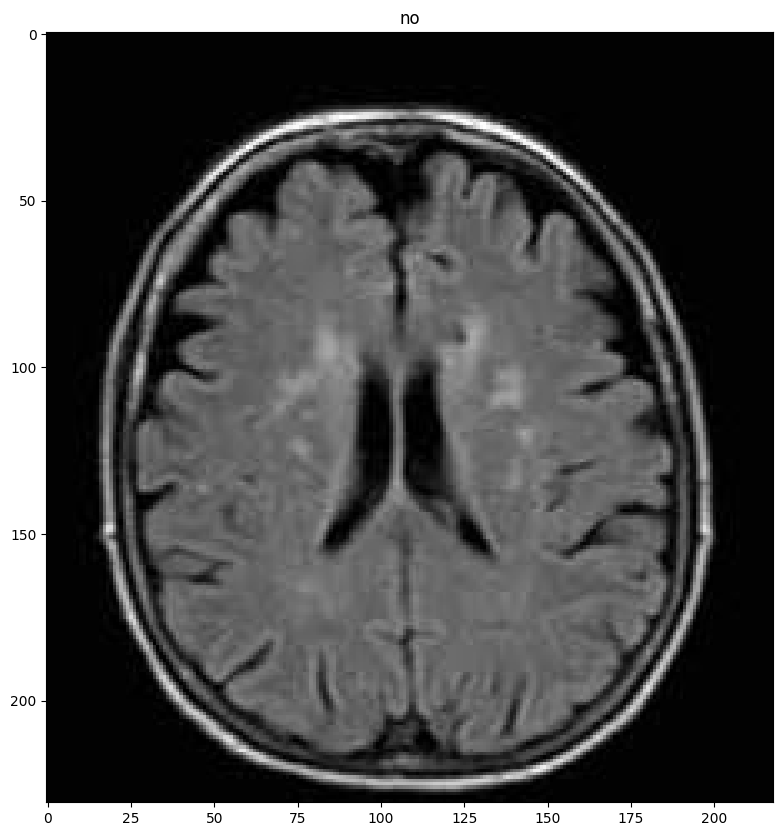

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'no')

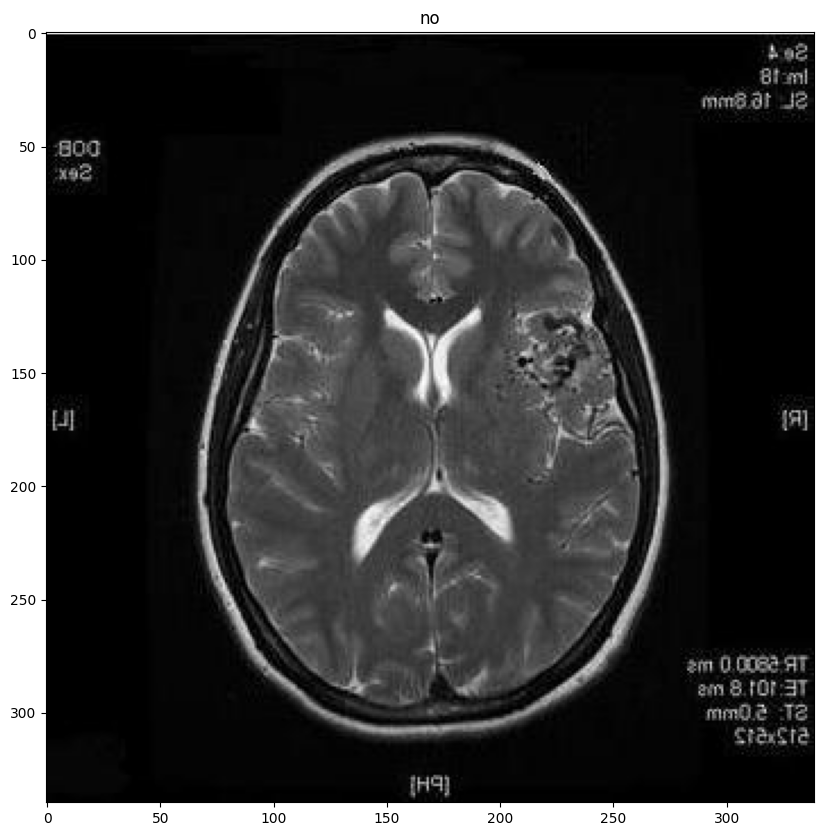

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

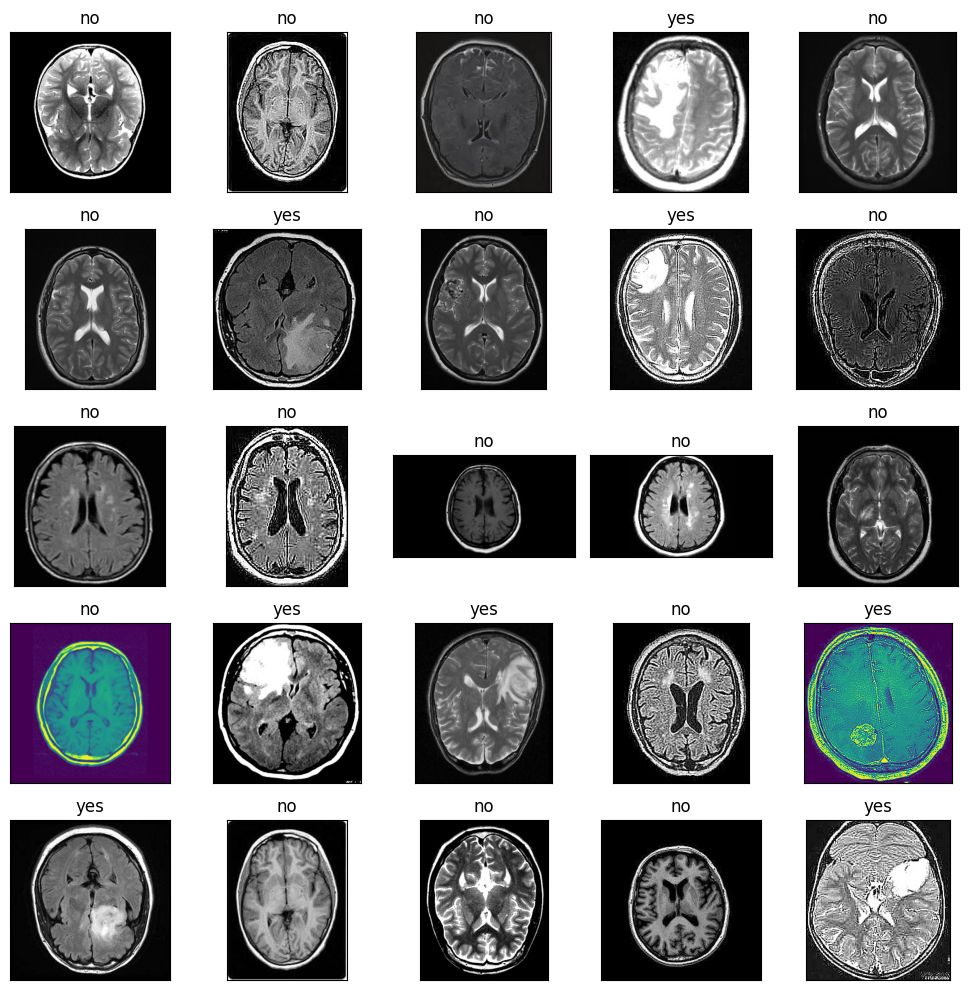

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

In [ ]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [ ]:
print(train_data.shape)

(2700, 2)


In [ ]:
print(train_data.shape)

(2700, 2)


In [ ]:
print(train_data.head())

                                                   JPG TUMOR_CATEGORY
433   /content/drive/MyDrive/brain tumer/no/no1113.jpg             no
1151   /content/drive/MyDrive/brain tumer/no/no639.jpg             no
73     /content/drive/MyDrive/brain tumer/yes/y358.jpg            yes
1536  /content/drive/MyDrive/brain tumer/no/no1414.jpg             no
2709   /content/drive/MyDrive/brain tumer/no/no375.jpg             no


In [ ]:
print(test_data.shape)

(300, 2)


In [ ]:
print(test_data.head())


                                                   JPG TUMOR_CATEGORY
1801   /content/drive/MyDrive/brain tumer/no/no285.jpg             no
1190   /content/drive/MyDrive/brain tumer/no/no696.jpg             no
1817  /content/drive/MyDrive/brain tumer/no/no1052.jpg             no
251   /content/drive/MyDrive/brain tumer/yes/y1284.jpg            yes
2505   /content/drive/MyDrive/brain tumer/yes/y915.jpg            yes


In [ ]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [ ]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


In [ ]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 1, 0]
(200, 200, 1)


In [ ]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 0, 0]
(200, 200, 1)


In [ ]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 0, 1, 1]
(200, 200, 1)


In [ ]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [ ]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=5,steps_per_epoch=10)

Epoch 1/5
10/10 [==============================] - 34s 3s/step - loss: 0.7050 - accuracy: 0.5750 - val_loss: 0.6586 - val_accuracy: 0.7852
Epoch 2/5
10/10 [==============================] - 29s 3s/step - loss: 0.6242 - accuracy: 0.6650 - val_loss: 0.5235 - val_accuracy: 0.7778
Epoch 3/5
10/10 [==============================] - 30s 3s/step - loss: 0.5802 - accuracy: 0.7450 - val_loss: 0.5258 - val_accuracy: 0.7889
Epoch 4/5
10/10 [==============================] - 36s 4s/step - loss: 0.5119 - accuracy: 0.7900 - val_loss: 0.4651 - val_accuracy: 0.7926
Epoch 5/5
10/10 [==============================] - 31s 3s/step - loss: 0.5184 - accuracy: 0.7350 - val_loss: 0.5346 - val_accuracy: 0.7963


In [ ]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

In [ ]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

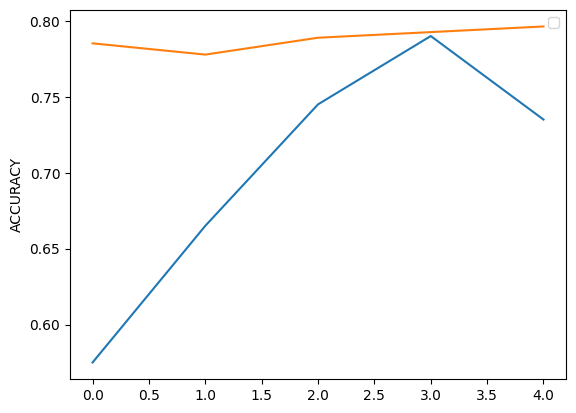

In [ ]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

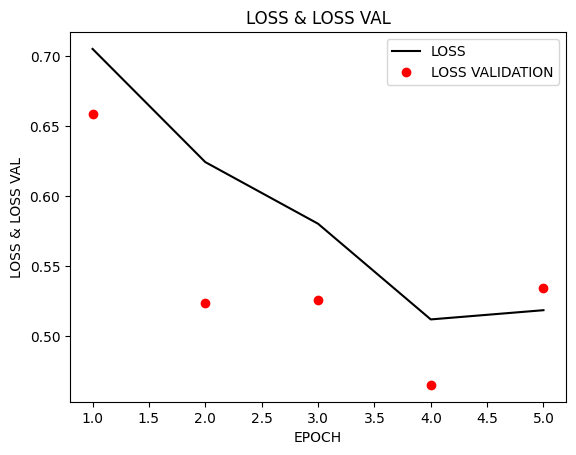

In [ ]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

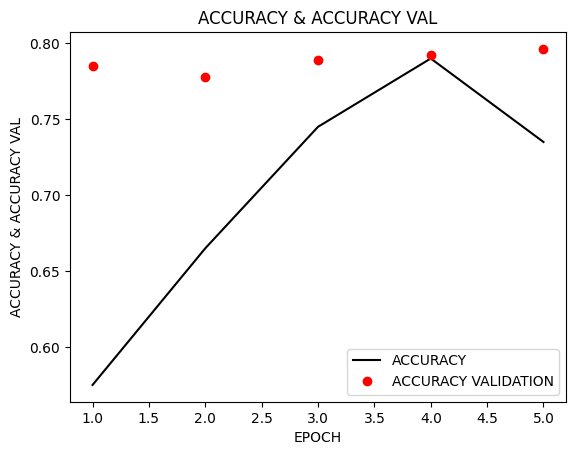

In [ ]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<Axes: >

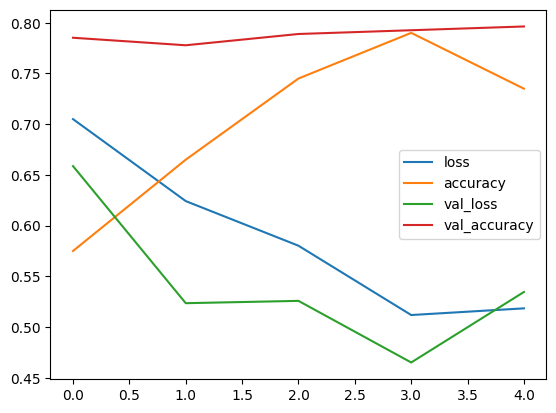

In [ ]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [ ]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.5917
ACCURACY:  0.69


In [ ]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [ ]:
print(Main_Data_Prediction.head())

                                                 JPG
0  /content/drive/MyDrive/brain tumer/pred/pred1.jpg
1  /content/drive/MyDrive/brain tumer/pred/pred11...
2  /content/drive/MyDrive/brain tumer/pred/pred14...
3  /content/drive/MyDrive/brain tumer/pred/pred10...
4  /content/drive/MyDrive/brain tumer/pred/pred13...


In [ ]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [ ]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [ ]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 [==============================] - 3s 837ms/step


In [ ]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
print(Model_Test_Prediction)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]


In [ ]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR']


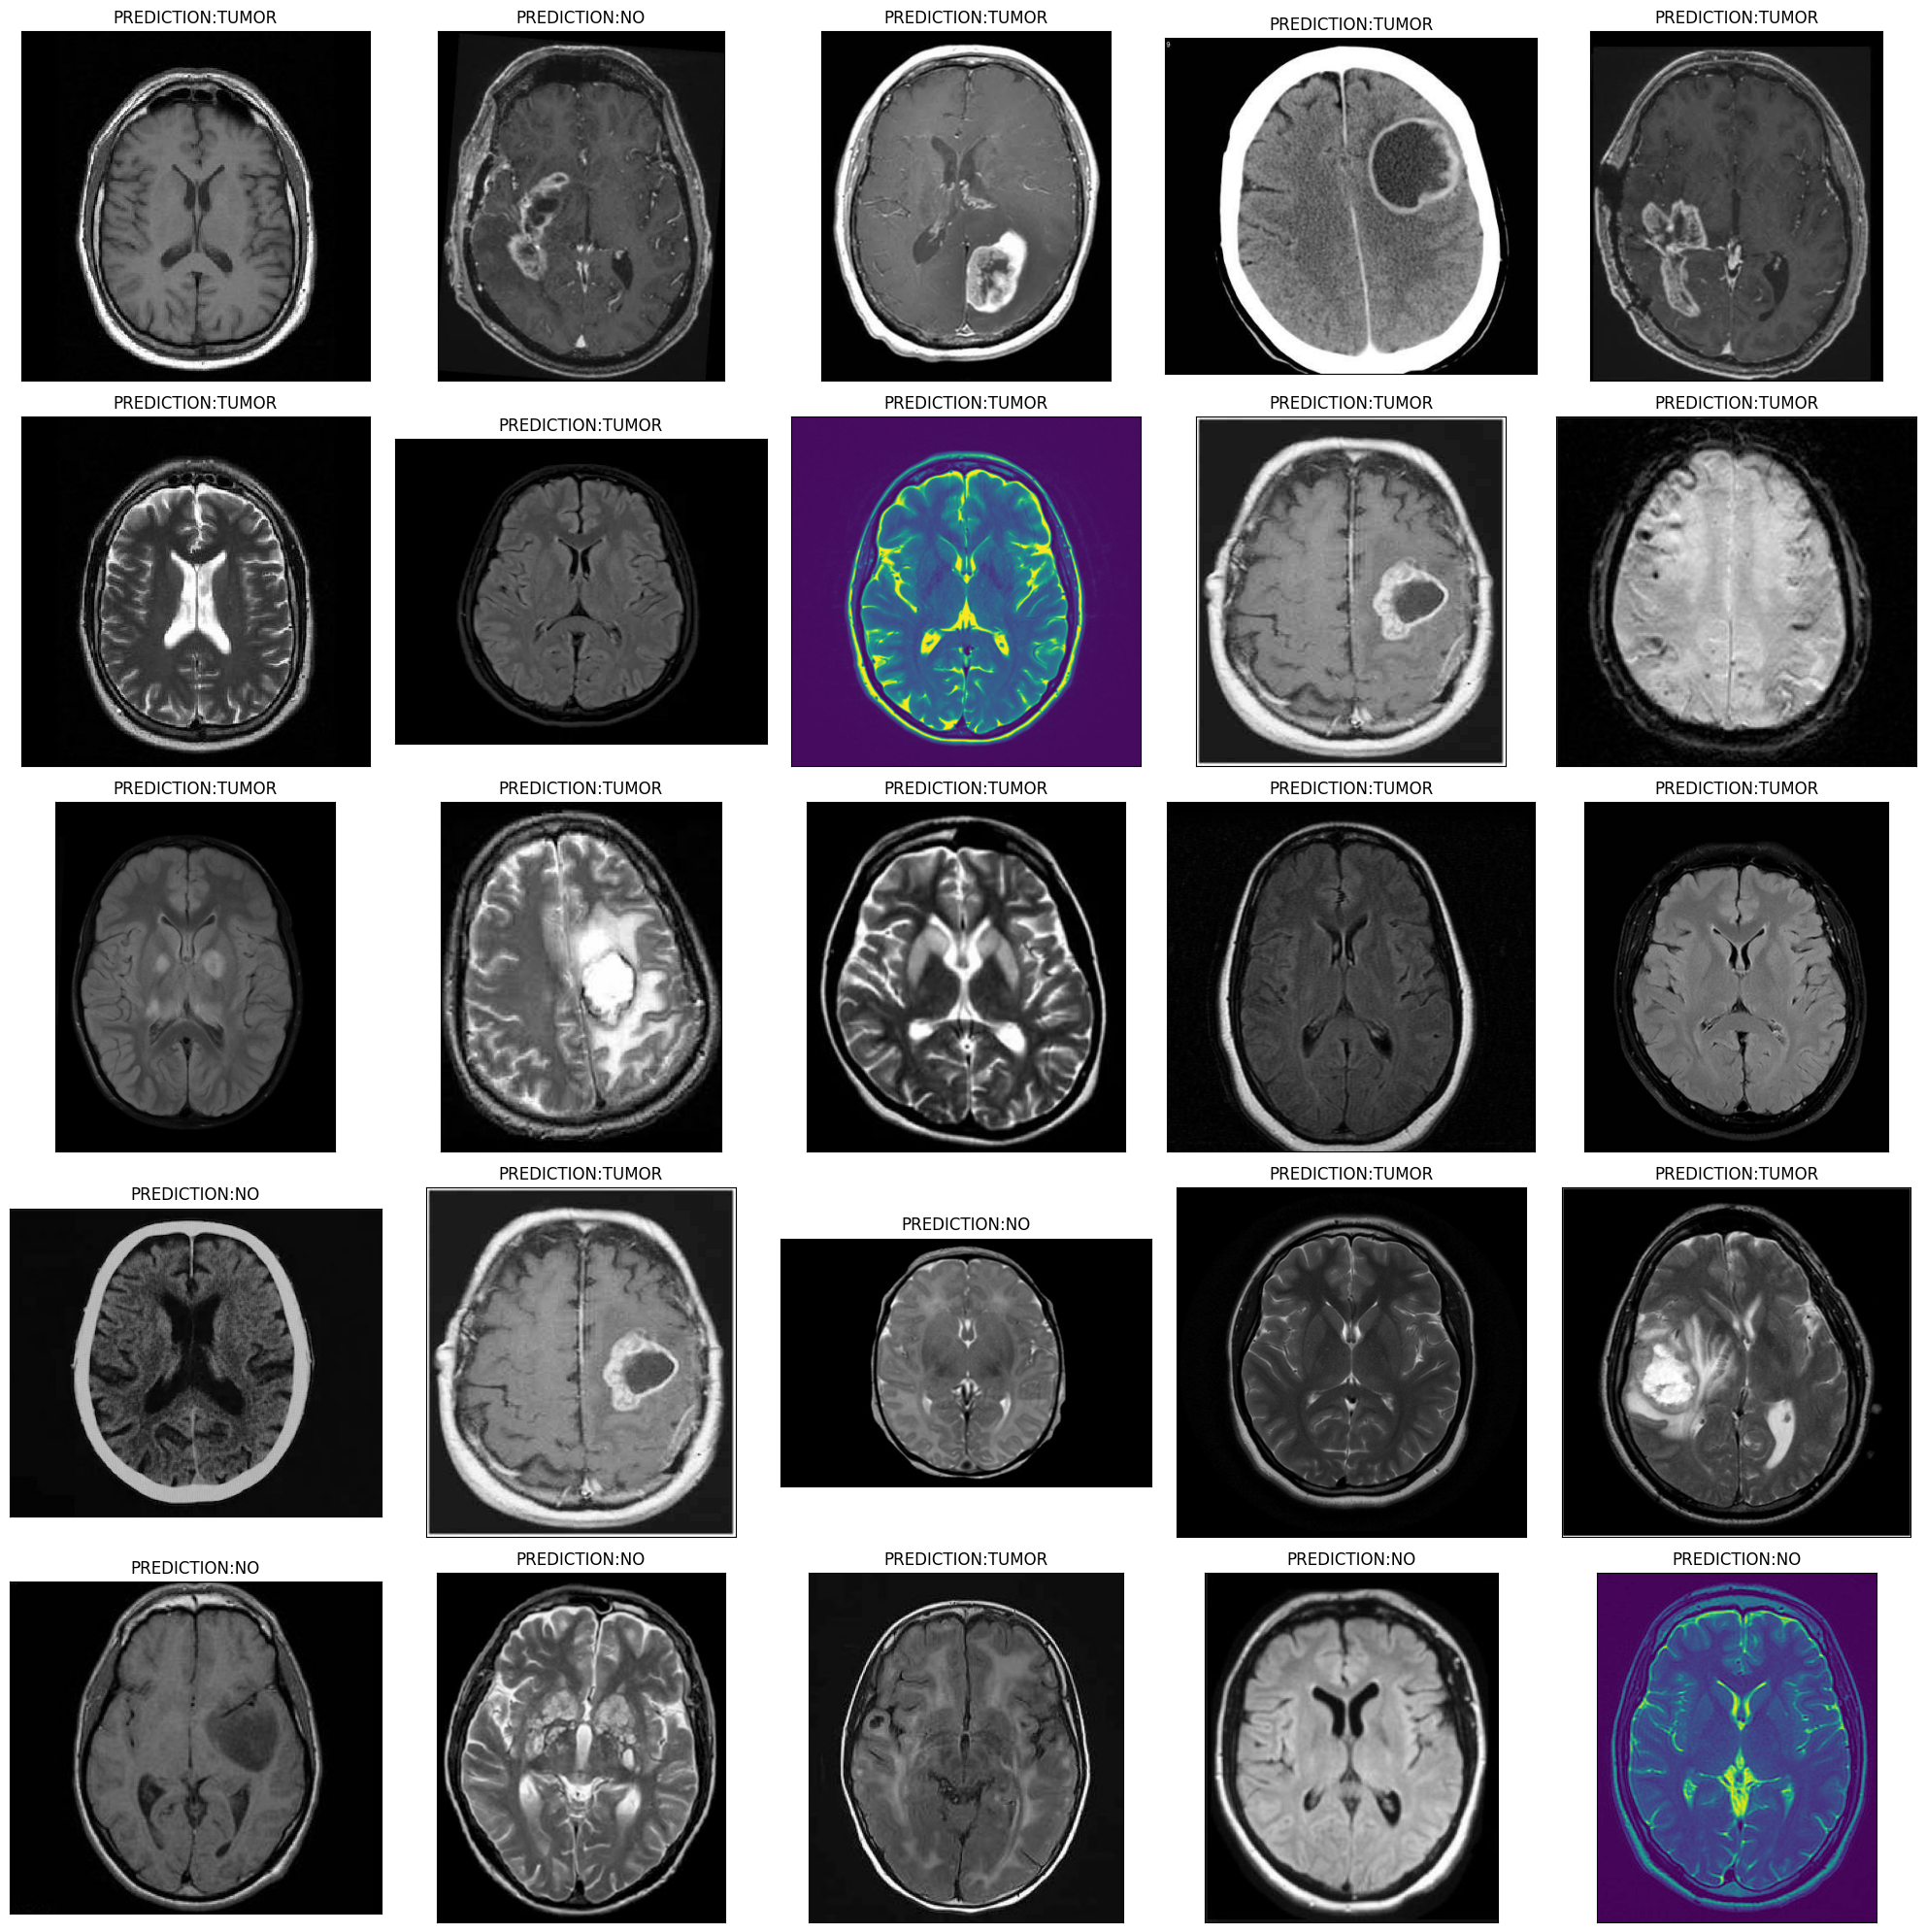

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

In [ ]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [ ]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [ ]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

In [ ]:
Model_Two.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=5)

Epoch 1/5
122/122 [==============================] - 239s 2s/step - loss: 0.6963 - accuracy: 0.5584 - val_loss: 0.6551 - val_accuracy: 0.6296
Epoch 2/5
122/122 [==============================] - 235s 2s/step - loss: 0.6428 - accuracy: 0.6473 - val_loss: 0.6111 - val_accuracy: 0.6778
Epoch 3/5
122/122 [==============================] - 234s 2s/step - loss: 0.6290 - accuracy: 0.6580 - val_loss: 0.5905 - val_accuracy: 0.6630
Epoch 4/5
122/122 [==============================] - 237s 2s/step - loss: 0.5959 - accuracy: 0.6938 - val_loss: 0.5294 - val_accuracy: 0.7556
Epoch 5/5
122/122 [==============================] - 236s 2s/step - loss: 0.5647 - accuracy: 0.7148 - val_loss: 0.5293 - val_accuracy: 0.7111


In [ ]:
print(Model_Two.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 128)      

In [ ]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

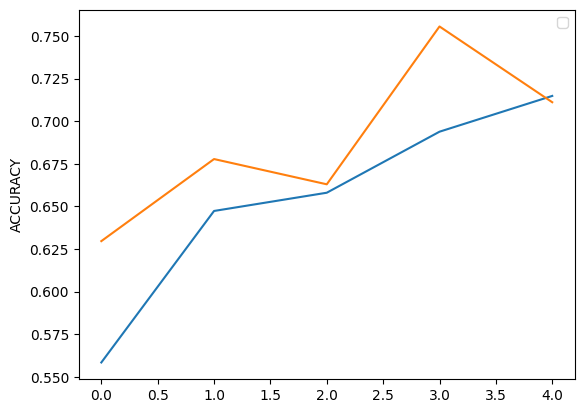

In [ ]:
plt.plot(ANN_Model_Two.history["accuracy"])
plt.plot(ANN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

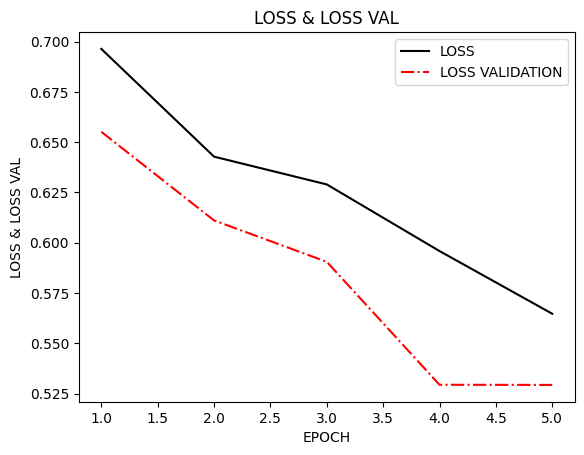

In [ ]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

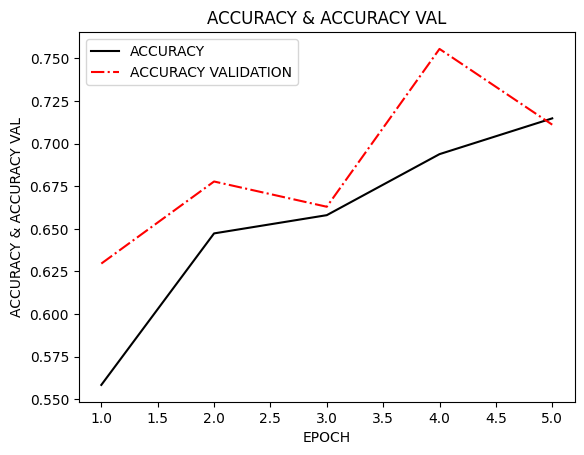

In [ ]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<Axes: >

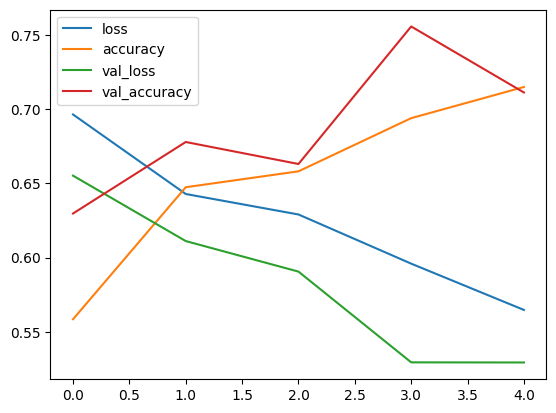

In [ ]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()

In [ ]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.5717
ACCURACY:  0.72


In [ ]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)

3/3 [==============================] - 2s 606ms/step


In [ ]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [ ]:
print(Model_Test_Prediction_Two)

[1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1]


In [ ]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO']


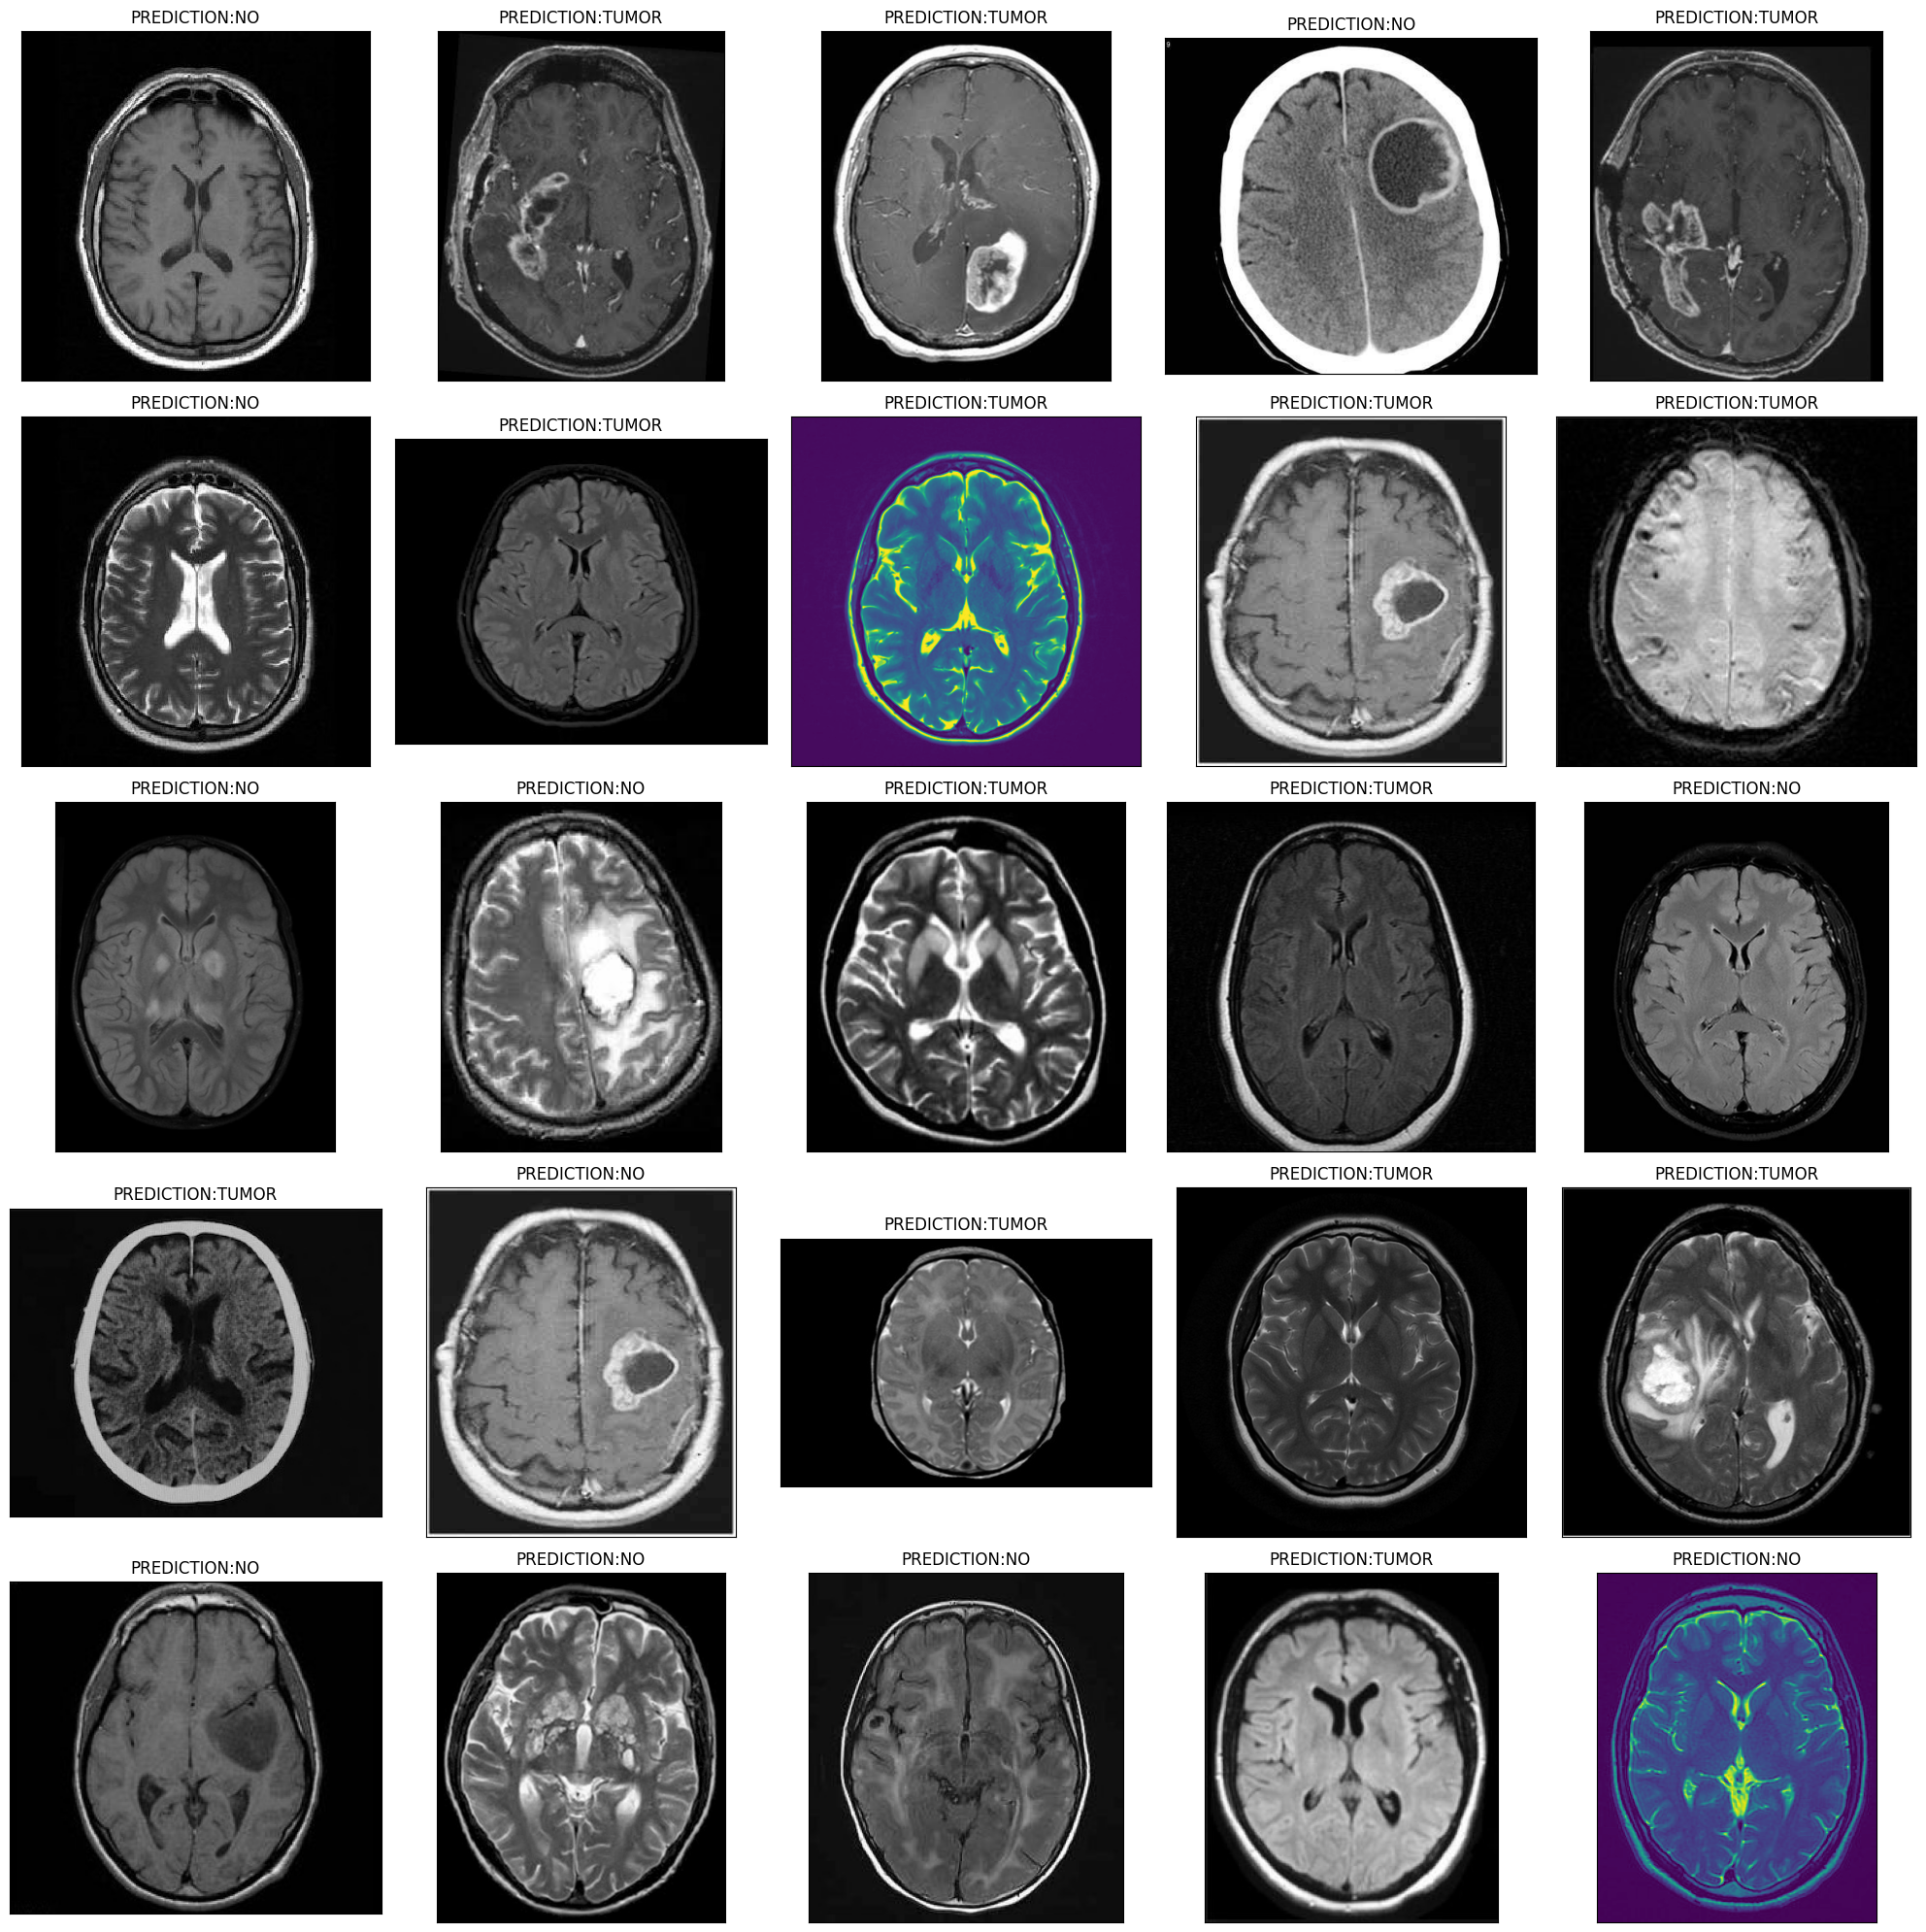

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()